### 数据加载与探索

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


In [19]:
### 加载数据集(数据集是列表形式，要先转换为pandas的数据类型)
data = load_breast_cancer()
X = data.data # 特征矩阵（569x30）
y = data.target # 标签（0=恶性，1=良性）

### 查看数据基本信息
print("特征名称:", data.feature_names)
print("样本数:", X.shape[0], "特征数:", X.shape[1])
print("标签分布:\n", pd.Series(y).value_counts()) # value_counts统计某列中每个唯一值出现的次数,按降序排列

### 随即查看5条样本
df = pd.DataFrame(X, columns=data.feature_names) # .feature_names是数据集bunch对象的一个属性用于存储特征名称列表
df['target'] = y # dataframe的新增操作，添加一列target值为y
print(df.sample(5)) # sample(5)随机抽取5项


特征名称: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
样本数: 569 特征数: 30
标签分布:
 1    357
0    212
Name: count, dtype: int64
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
394       12.100         17.72           78.07      446.2          0.10290   
523       13.710         18.68           88.73      571.0          0.09916   
447       14.800         17.66           95.88      674.8          0.09179   
110        9.777         16.99           62.50      290.2  

### 数据预处理

In [20]:
### 划分数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state是固定每次随机划分结果相同，42没有特殊含义

### 标准化特征（逻辑回归对特征尺度敏感）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print("训练集维度:", X_train_scaled.shape)
print("测试集维度:", X_test_scaled.shape)

训练集维度: (455, 30)
测试集维度: (114, 30)


### 手动实现逻辑回归

In [21]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def _sigmoid(self, z):
        """Sigmoid函数，将线性输出映射到[0, 1]概率"""
        return 1 / (1 + np.exp(-z))
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        ### 梯度下降优化
        for _ in range(self.n_iters):
            ### 计算预测概率
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            ### 计算梯度
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            ### 更新参数
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict_proba(self, X):
        """返回每个样本属于类别1的概率"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """根据阈值返回类别"""
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int) # 转换类型为整数
    
### 训练手动实现的模型
manual_model = LogisticRegressionManual(learning_rate=0.01, n_iters = 2000)
manual_model.fit(X_train_scaled, y_train)

### 预测测试集
y_pred_manual = manual_model.predict(X_test_scaled)
y_proba_manual = manual_model.predict_proba(X_test_scaled)
    

### sklearn实现

In [22]:
### 创建并训练模型
sklearn_model = LogisticRegression(max_iter=2000)
sklearn_model.fit(X_train_scaled, y_train)

### 预测测试集
y_pred_sklearn = sklearn_model.predict(X_test_scaled)
y_proba_sklearn = sklearn_model.predict_proba(X_test_scaled)[:, 1] # 取类别为1的概率


### 模型评估和可视化


[手动实现] 准确率: 0.982
[手动实现] 混淆矩阵:
 [[41  2]
 [ 0 71]]

[Sklearn实现] 准确率: 0.982
[Sklearn实现] 混淆矩阵:
 [[41  2]
 [ 0 71]]


D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.c

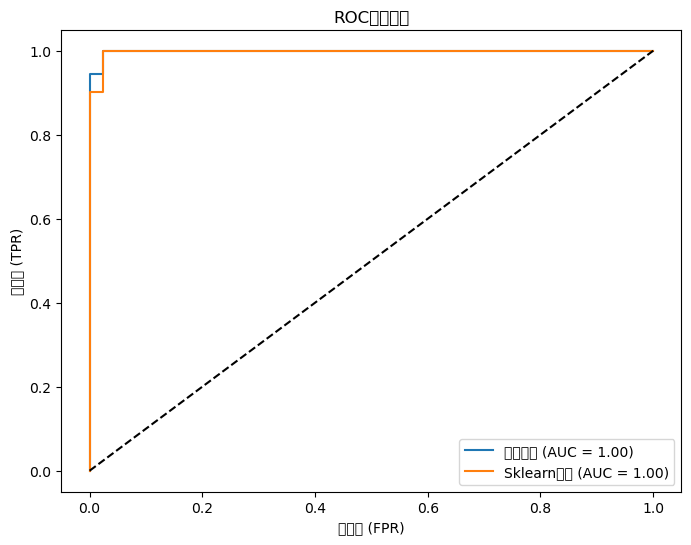


TOP 5重要特征:
worst texture: 权重绝对值=1.351
radius error: 权重绝对值=1.268
worst symmetry: 权重绝对值=1.208
mean concave points: 权重绝对值=1.120
worst concavity: 权重绝对值=0.943


In [23]:
### 评估指标
def evaluate_model(y_true, y_pred, y_proba, model_name):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    print(f"\n[{model_name}] 准确率: {acc:.3f}")
    print(f"[{model_name}] 混淆矩阵:\n", cm)
    
    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

### 对比两个模型
plt.figure(figsize=(8, 6))
evaluate_model(y_test, y_pred_manual, y_proba_manual, "手动实现")
evaluate_model(y_test, y_pred_sklearn, y_proba_sklearn, "Sklearn实现")
plt.plot([0, 1], [0, 1], 'k--') # 从（0，0）到（1，1）绘制一条对角线，k表黑色，--表虚线，roc曲线越接近对角线是效果越好
plt.xlabel('假正率 (FPR)')
plt.ylabel('真正率 (TPR)')
plt.title('ROC曲线对比')
plt.legend() # 自动生成图例
plt.show()

### 输出特征的重要性（权重）
top_features = 5
sorted_indices = np.argsort(np.abs(sklearn_model.coef_[0]))[::-1] # argsort获取从小到大的索引，取逆为从大到小
print("\nTOP 5重要特征:")
for i in range(top_features):
    idx = sorted_indices[i]
    print(f"{data.feature_names[idx]}: 权重绝对值={np.abs(sklearn_model.coef_[0][idx]):.3f}")
                          